## Import modules, data and packages

In [1]:
import models.road_network.create_graph as cg
import models.vehicle_models.energy_consumption as ec
import simulation.simulate_routes as sr
import main as m
import json
import math
import pandas as pd
import random
from pprint import pprint
import matplotlib.pyplot as plt

FileNotFoundError: [Errno 2] No such file or directory: './data_acquisition/test_data.json'

Collect data, and config files

In [ ]:
with open("./data_collection/data/test_data.json", "r") as file:
    complete_road_data = json.load(file)
with open("models/vehicle_models/static_data.json", "r") as file:
    static_data = json.load(file)
with open("models/vehicle_models/vehicle_data.json", "r") as file:
    vehicle_data = json.load(file)
with open("models/vehicle_models/battery_data.json", "r") as file:
    battery_data = json.load(file)

road_network_file = './data_collection/data/random_weight_edge.csv' 
road_df = pd.read_csv(road_network_file)


Define key variables and compile graph

In [ ]:
OCV = battery_data["OCV"]
capacity = battery_data["Capacity"]
R_int = battery_data["R_internal"]
motor_eff = vehicle_data["motor_eff"]

graph = cg.create_osmnx_compatible_graph('./data_collection/data/random_weight_edge.csv')

## Define Variables and Routes

Create random route.

In [ ]:
nodes = road_df["u"].to_list()
random_values = random.sample(nodes, 2)
print(random_values)

[4585717387, 26070181]


Find route using dijkstra's algorithm, plot graph

[4585717387, 4585717379, 1986278336, 1986278333, 26070175, 26070171, 26070172, 26218282, 26070189, 26070190, 26070191, 26070193, 26070196, 1130492610, 26070209, 26070181]


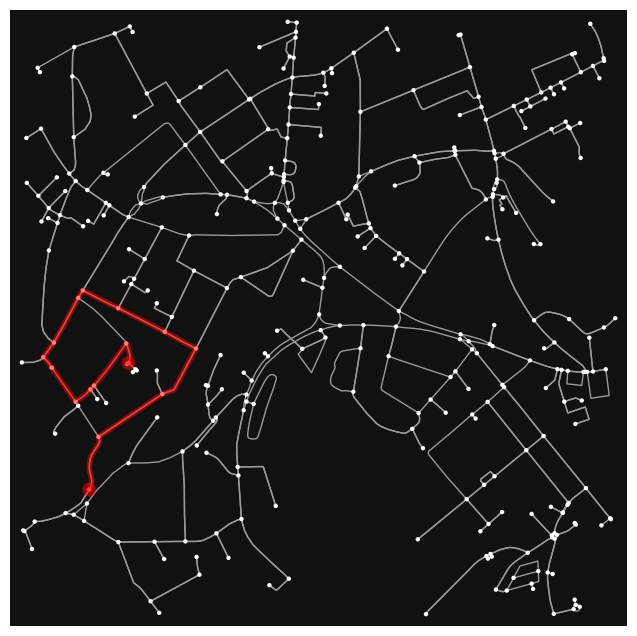

In [ ]:
route = cg.dijkstra(graph, random_values[0], random_values[1])
print(route)
fig, ax = cg.plot_graph_with_routes(graph,route)

## Analyse Route and Collect Data

In [ ]:
with open("./data_collection/data/analysed_dis_data.json", "r") as file:
    map_data = json.load(file)
cg.find_path_with_nodes(map_data, 17585126, 1130492591)

route_dict = {}

i = 0
for i in range(len(route)-1):
    path = cg.find_path_with_nodes(map_data, route[i], route [i + 1])
    route_dict.update(path)

simulated_route = sr.find_route(map_data,road_df, graph)
sim_dist, sim_consum, sim_climb = sr.return_route_data(route_dict, vehicle_data, static_data, motor_eff)

print("---- Route Analysis ----")
print(f'Distance Travelled: {round(sim_dist,2)}m')
print(f'Energy Consumption: {round(sim_consum, 2)}Wh')
print(f'Overall Climb: {round(sim_climb,2)}m')

---- Route Analysis ----
Distance Travelled: 1199.67m
Energy Consumption: 66.86Wh
Overall Climb: -2.39m


Load map data to use for analysis.

In [ ]:
with open("./data_collection/data/analysed_dis_data.json", "r") as file:
    map_data = json.load(file)

Match route identified with necessary data

In [ ]:
cg.find_path_with_nodes(map_data, 17585126, 1130492591)
route_dict = {}

i = 0
print(len(route))
for i in range(len(route)-1):
    path = cg.find_path_with_nodes(map_data, route[i], route [i + 1])
    route_dict.update(path)

16


In [ ]:
consumptions = []
distances = []
climbs = []

for path, pathdata in route_dict.items():
    for section, data in pathdata.items():
        if "section" in section: 
            data["velocity"] = 8.9408
            data["acceleration"] = 0
            tract_power = ec.physical_model(vehicle_data, static_data, data)
            batt_power = ec.battery_power_model(tract_power, motor_eff)

            energy = ec.get_edge_consumption(batt_power, data)

            distances.append(data['distance'])
            consumptions.append(energy)
            climbs.append(data['climb'])

print(f'Energy: {round(sum(consumptions),2)}')
print(f'Climb: {round(sum(climbs),2)}m')
print(f'Distance: {round(sum(distances),2)}m')

Energy: 66.86
Climb: -2.39m
Distance: 1199.67m


route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route not found
route no

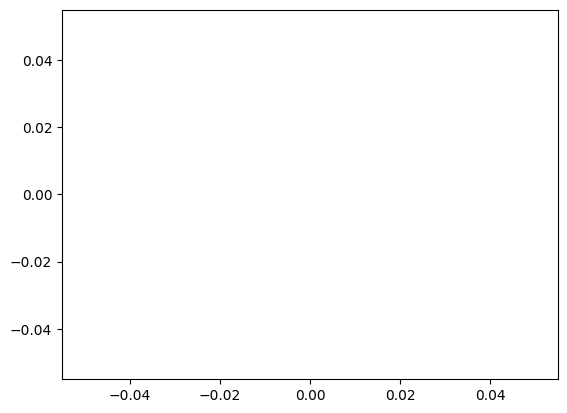

In [ ]:
distances = []
consumptions = []
climbs = []

for i in range(1,300):
    try:
        distance, consumption, climb = m.simulate_route()
        distances.append(distance)
        consumptions.append(consumption)
        climbs.append(climb)
    except:
        print("route not found")

plt.scatter(climbs, consumptions)
    